Nombre: Eider Alejandro Peña Dagua

CC: 1214743567

In [4]:
import random
import matplotlib.pyplot as plt
import numpy as np
import statistics as stats
import pandas as pd
from math import sqrt
import math as math
from scipy.stats import sem, t

In [7]:
def simulacion(N,M):
  ee=7
  media=40
  it=0
  utilidad_it=[]
  while it<M:
    r1=random.random()
    r2=random.random()
    x1=math.sqrt(-2*math.log(r1))*math.cos(2*math.pi)*r2
    demanda=int(round(media+ee*x1,0))
    cost_pedido=N*10000
    precio_venta_total=0
    if demanda>N:
      cant_nuevo_pedido=demanda-N
      cost_nuevo_pedido=12000*cant_nuevo_pedido
      cost_pedido+=cost_nuevo_pedido
      precio_venta_total=(N+cant_nuevo_pedido)*15000
    elif demanda<N:
      cant_sobrantes=N-demanda
      precio_venta_s=cant_sobrantes*9000
      precio_venta_total=(demanda*15000)+precio_venta_s

    utilidad=precio_venta_total-cost_pedido
    utilidad_it.append(utilidad)
    it=it+1
  return utilidad_it


Inserte el número de carros a pedir: 10
Inserte el número de simulaciones: 10
720000 - 556000
615000 - 472000
630000 - 484000
600000 - 460000
615000 - 472000
675000 - 520000
630000 - 484000
630000 - 484000
600000 - 460000
615000 - 472000


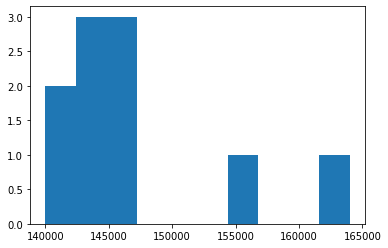

146600


In [6]:
#codigo para sol un nuermo de pedidos
N=int(input("Inserte el número de carros a pedir: "))
M=int(input("Inserte el número de simulaciones: "))
utilidades=simulacion(N,M)
#print(utilidades)
plt.hist(utilidades)
plt.show()
promedio=stats.mean(utilidades )
print(promedio)

In [8]:
#codigo para realizar varias simulaciones con difernete cantidad de numero de pedidos y con 1000 simulaciones
lista=[]
for i in range(0,100):
  lista.append(i)
m1=10000
lista_utilidades=[]
for i in lista:
    s=simulacion(i,m1)
    d=stats.mean(s)
    lista_utilidades.append(d)
print(lista_utilidades)

[133131.3, 135244.7, 137126.5, 138903.6, 141152.3, 143026.6, 145054.2, 147197.6, 149170.3, 151195.5, 153048.8, 155264.8, 157307.7, 159102.8, 161269, 162924.9, 165139.4, 167229.4, 169032.9, 171112.1, 173284, 175251, 177164, 179104.3, 180912.6, 183141.5, 185375.2, 187000.5, 189071, 191193.1, 193030.8, 195089, 197257, 199202.4, 201022.4, 203090.8, 204767.1, 206978.3, 208943.8, 211229.4, 160260.2, 115810.3, 126288.3, 139366.1, 153820.6, 157462.8, 169313, 177411.4, 181093.2, 190400.3, 193715.8, 198604.8, 203235.5, 203139.7, 205258.5, 206487.8, 206203.6, 207001.5, 206383.4, 206263.6, 205164.3, 205114.7, 203862.4, 203265.6, 202431.8, 200972.2, 199977, 199393.4, 198552.4, 197256.9, 196118.6, 194932, 194266.8, 193433, 192323.2, 191391, 190536.2, 189032.2, 188198.4, 187020.8, 185811.4, 185195.4, 184359.2, 183209.2, 182291.4, 181347.2, 180284.8, 179440.2, 177956, 177341.8, 175992.6, 175395.2, 174241.6, 172916.4, 172297.4, 171253.6, 170111.4, 169123.4, 167882.8, 167368.2]


Codigo para fromar un tabla de la cantidad y el promedio de utilidades de esa cantidad en las diferentes simulaciones

In [9]:
dicc={'cantidad':lista,"Promedio":lista_utilidades}
df = pd.DataFrame(dicc)
print(df)

    cantidad  Promedio
0          0  133131.3
1          1  135244.7
2          2  137126.5
3          3  138903.6
4          4  141152.3
..       ...       ...
95        95  171253.6
96        96  170111.4
97        97  169123.4
98        98  167882.8
99        99  167368.2

[100 rows x 2 columns]


Grafica de la utilidad promedio de pedir una cantidad de autos 

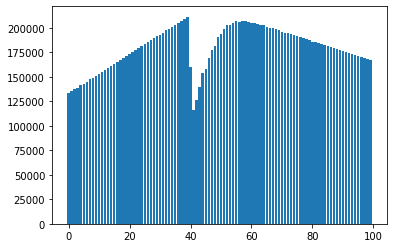

In [10]:
x_values = df['cantidad'].unique()
y_values = df['Promedio']
plt.bar(x_values, y_values)
plt.show()

In [ ]:

confidence = 0.95
media = df['Promedio'].mean()
std = df['Promedio'].std()
n = len(lista_utilidades)
std_err = sem(lista_utilidades)
h = std_err * t.ppf((1 + confidence) / 2, n - 1)      # Calculamos el intervalo de confianza

lim_inf = media - h
lim_sup = media + h
print ("Intervalo de confianza para los costos anuales: ",int(round(lim_inf,2)), " -- ", int(round(lim_sup,2)))

Intervalo de confianza para los costos anuales:  -17315  --  72564
